In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [157]:
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [158]:
dataset = pd.read_excel('Contraceptive_method_dataset.xlsx')
dataset.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [159]:
dups = dataset.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(dataset.shape)

Number of duplicate rows = 80
(1473, 10)


In [160]:
dups = dataset[dataset.duplicated()]
dups

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
79,38.0,Tertiary,Tertiary,1.0,Scientology,Yes,1,Very High,Exposed,No
167,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
224,47.0,Tertiary,Tertiary,4.0,Scientology,No,1,Very High,Exposed,No
270,30.0,Tertiary,Tertiary,2.0,Scientology,No,1,Very High,Exposed,No
299,26.0,Tertiary,Tertiary,1.0,Scientology,No,1,Very High,Exposed,No
394,29.0,Tertiary,Tertiary,0.0,Scientology,Yes,2,Very High,Exposed,No
414,20.0,Primary,Secondary,3.0,Scientology,No,3,Very High,Exposed,No
462,36.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
492,37.0,Tertiary,Tertiary,3.0,Scientology,No,1,Very High,Exposed,Yes
528,29.0,Tertiary,Tertiary,2.0,Scientology,Yes,1,High,Exposed,Yes


In [161]:
dataset.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [162]:
from scipy.stats import iqr

In [163]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [164]:
dataset.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [165]:
dataset['Husband_Occupation'] = dataset.Husband_Occupation.astype(object)

In [166]:
dataset.dtypes

Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation            object
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object

In [167]:
dataset.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,NaN,NaN,NaN,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.0,NaN,NaN,NaN,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,4.0,3.0,585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
mode1 = dataset["Wife_age"].mode()
mode1

0    25.0
Name: Wife_age, dtype: float64

In [169]:
median_1 = dataset["Wife_age"].median()

In [170]:
dataset['Wife_age'].fillna(value=median_1, inplace=True)

In [171]:
dataset["Wife_age"].mean()

32.57705363204345

In [172]:
mode2 = dataset["No_of_children_born"].mode()
mode2

0    2.0
Name: No_of_children_born, dtype: float64

In [173]:
median_2 = dataset["No_of_children_born"].median()

In [174]:
dataset['No_of_children_born'].fillna(value=median_2, inplace=True)

In [175]:
dataset["No_of_children_born"].mean()

3.25050916496945

In [176]:
dataset.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [177]:
for feature in dataset.columns: 
    if dataset[feature].dtype == 'object': 
        print(feature)
        print(dataset[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


Wife_Working
No     1104
Yes     369
Name: Wife_Working, dtype: int64


Husband_Occupation
3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64


Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64




In [178]:
dataset.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education', 'No_of_children_born', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ', 'Contraceptive_method_used'], dtype='object')

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='Count'>

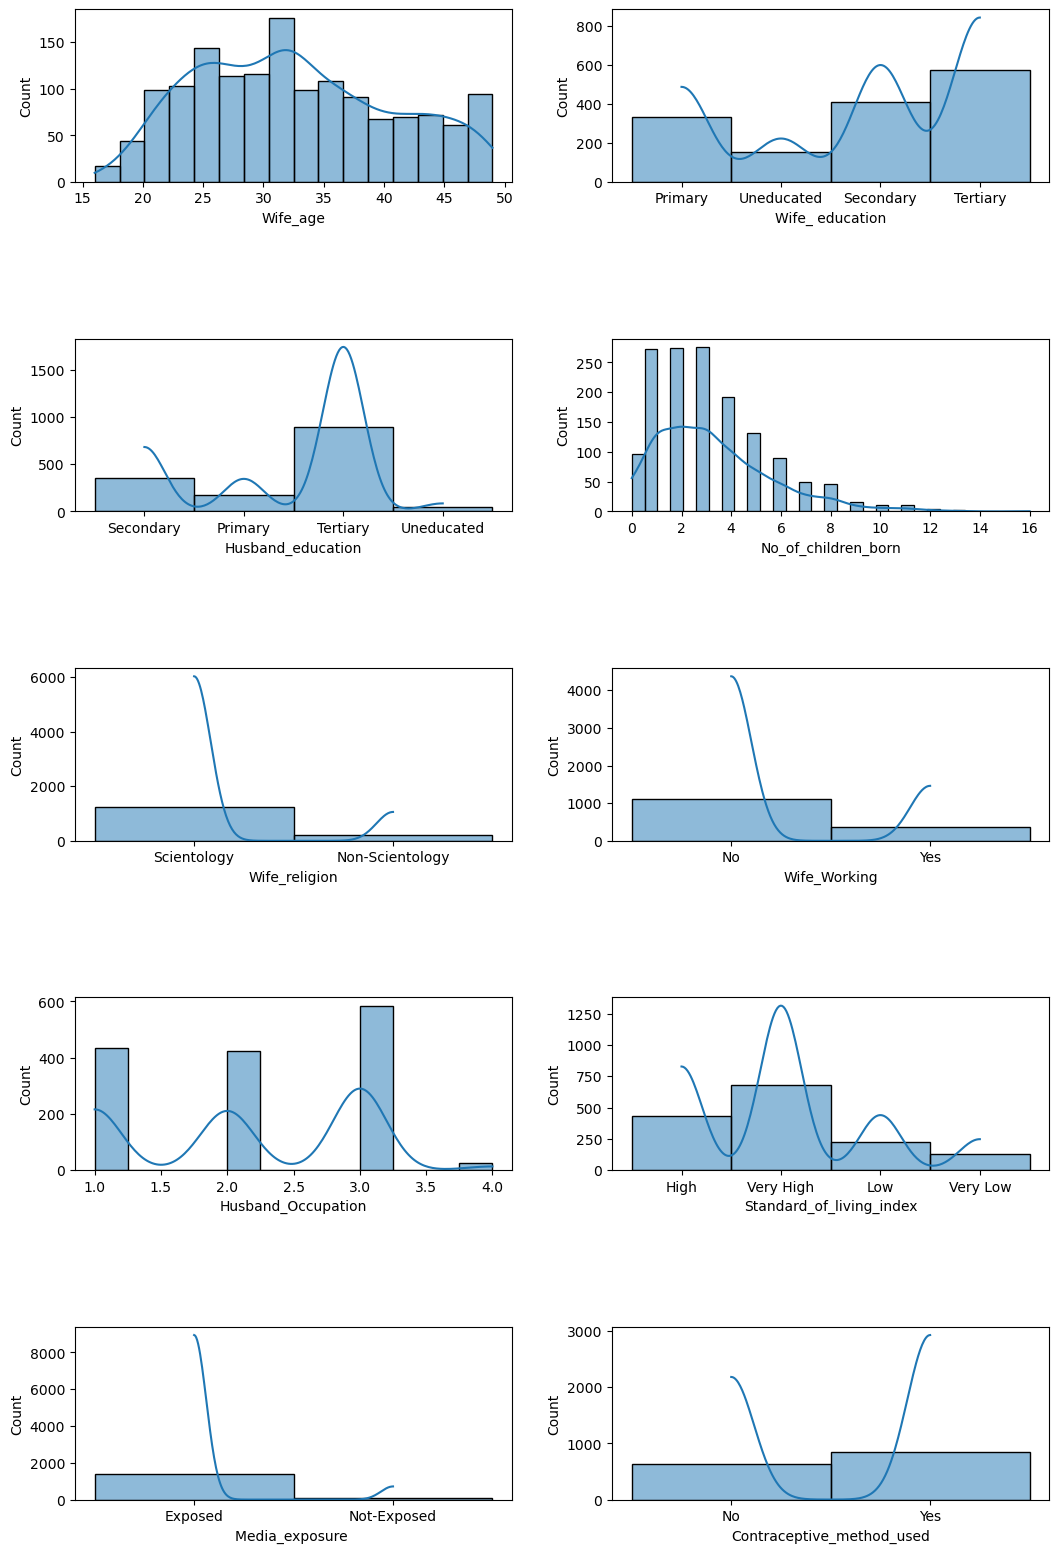

In [179]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.tight_layout()
fig.set_size_inches(11,17)
sns.histplot(dataset['Wife_age'], kde=True, ax=axes[0][0])
sns.histplot(dataset['Wife_ education'], kde=True, ax=axes[0][1])
sns.histplot(dataset['Husband_education'], kde=True, ax=axes[1][0])
sns.histplot(dataset['No_of_children_born'], kde=True, ax=axes[1][1])
sns.histplot(dataset['Wife_religion'], kde=True, ax=axes[2][0])
sns.histplot(dataset['Wife_Working'], kde=True, ax=axes[2][1])
sns.histplot(dataset['Husband_Occupation'], kde=True, ax=axes[3][0])
sns.histplot(dataset['Standard_of_living_index'], kde=True, ax=axes[3][1])
sns.histplot(dataset['Media_exposure '], kde=True, ax=axes[4][0])
sns.histplot(dataset['Contraceptive_method_used'], kde=True, ax=axes[4][1])

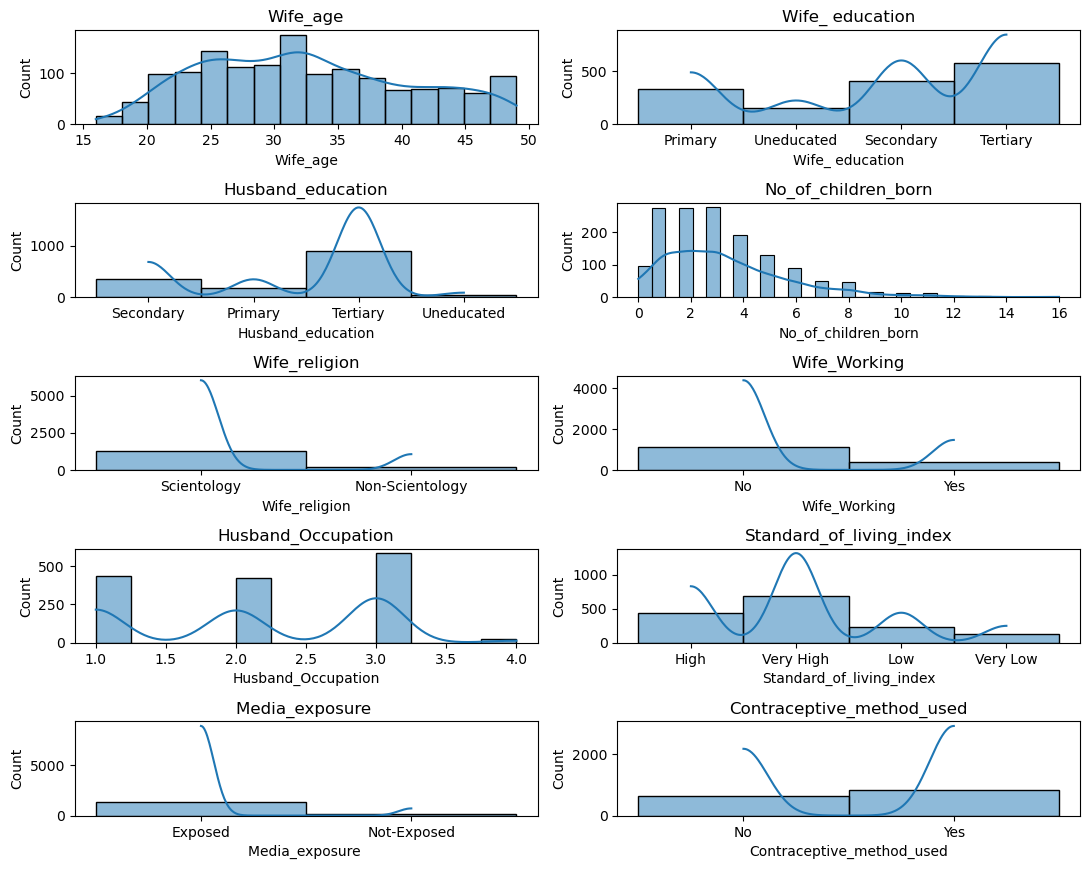

In [180]:
dataset_col = dataset.columns
a = len(dataset_col)
b = 2
c = 1 
fig = plt.figure(figsize=(11,17))
for i in dataset_col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.histplot(dataset[i],kde='True')
    c = c + 1
plt.tight_layout()
plt.show()

In [181]:
num = dataset.select_dtypes(['float64','int64'])
cat = dataset.select_dtypes(['object'])

In [182]:
def zero_count(_series):
    counter=0
    for val in _series:
        if val==0:
            counter+=1
    return counter 

def negative_count(_series):
    counter=0
    for val in _series:
        if val < 0:
            counter+=1
    return counter 

def percent_outlier(_series):
    counter = 0
    lb = np.quantile(_series,.25) - (1.5*iqr(_series))
    ub = np.quantile(_series,.75) + (1.5*iqr(_series))
    for val in _series:
        if val>ub or val<lb: 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

stat_list = ['TOTAL RECORDS',
 'NULL COUNT',
 'ZERO COUNT',
 'NEGATIVE COUNT',
 'MIN',
 'MAX',
 'RANGE',
 'MEAN',
 'MEDIAN',
 'MODE',
 'VARIANCE',
 'STD DEV',
 'Q1',
 'Q3',
 'IQR',
 'SKEWNESS',
 'KURTOSIS']

def stat_function(_series):
    return [round(val,2) for val in 
          [len(_series),
           _series.isna().sum(),
           zero_count(_series),
           negative_count(_series),
           min(_series),
           max(_series),
           max(_series)-min(_series),
           _series.mean(),
           np.percentile(_series,.5),
           _series.mode()[0],
           st.variance(_series),
           st.stdev(_series),
           np.quantile(_series,.25),
           np.quantile(_series,.75),
           iqr(_series),
           stats.skew(_series),
           stats.kurtosis(_series)]
          ]

def stat_df(data, feature_list):
    stat_dictionary = {}
    for x in feature_list:
        stat_dictionary[x] = stat_function(data[x])
    return pd.DataFrame(stat_dictionary, index = stat_list).T

# Finding % Outliers in our Data
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),2)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [183]:
categoriacl_features=[]
numerical_features=[]
for i in dataset.columns:
    if dataset[i].dtype=="object":
        categoriacl_features.append(i)
    else:
        numerical_features.append(i)
print(categoriacl_features) 
print(numerical_features)


['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ', 'Contraceptive_method_used']
['Wife_age', 'No_of_children_born']


In [184]:
outlier_percentage_df(dataset, numerical_features)

,% OUTLIERS
No_of_children_born,3.05
Wife_age,0.00


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


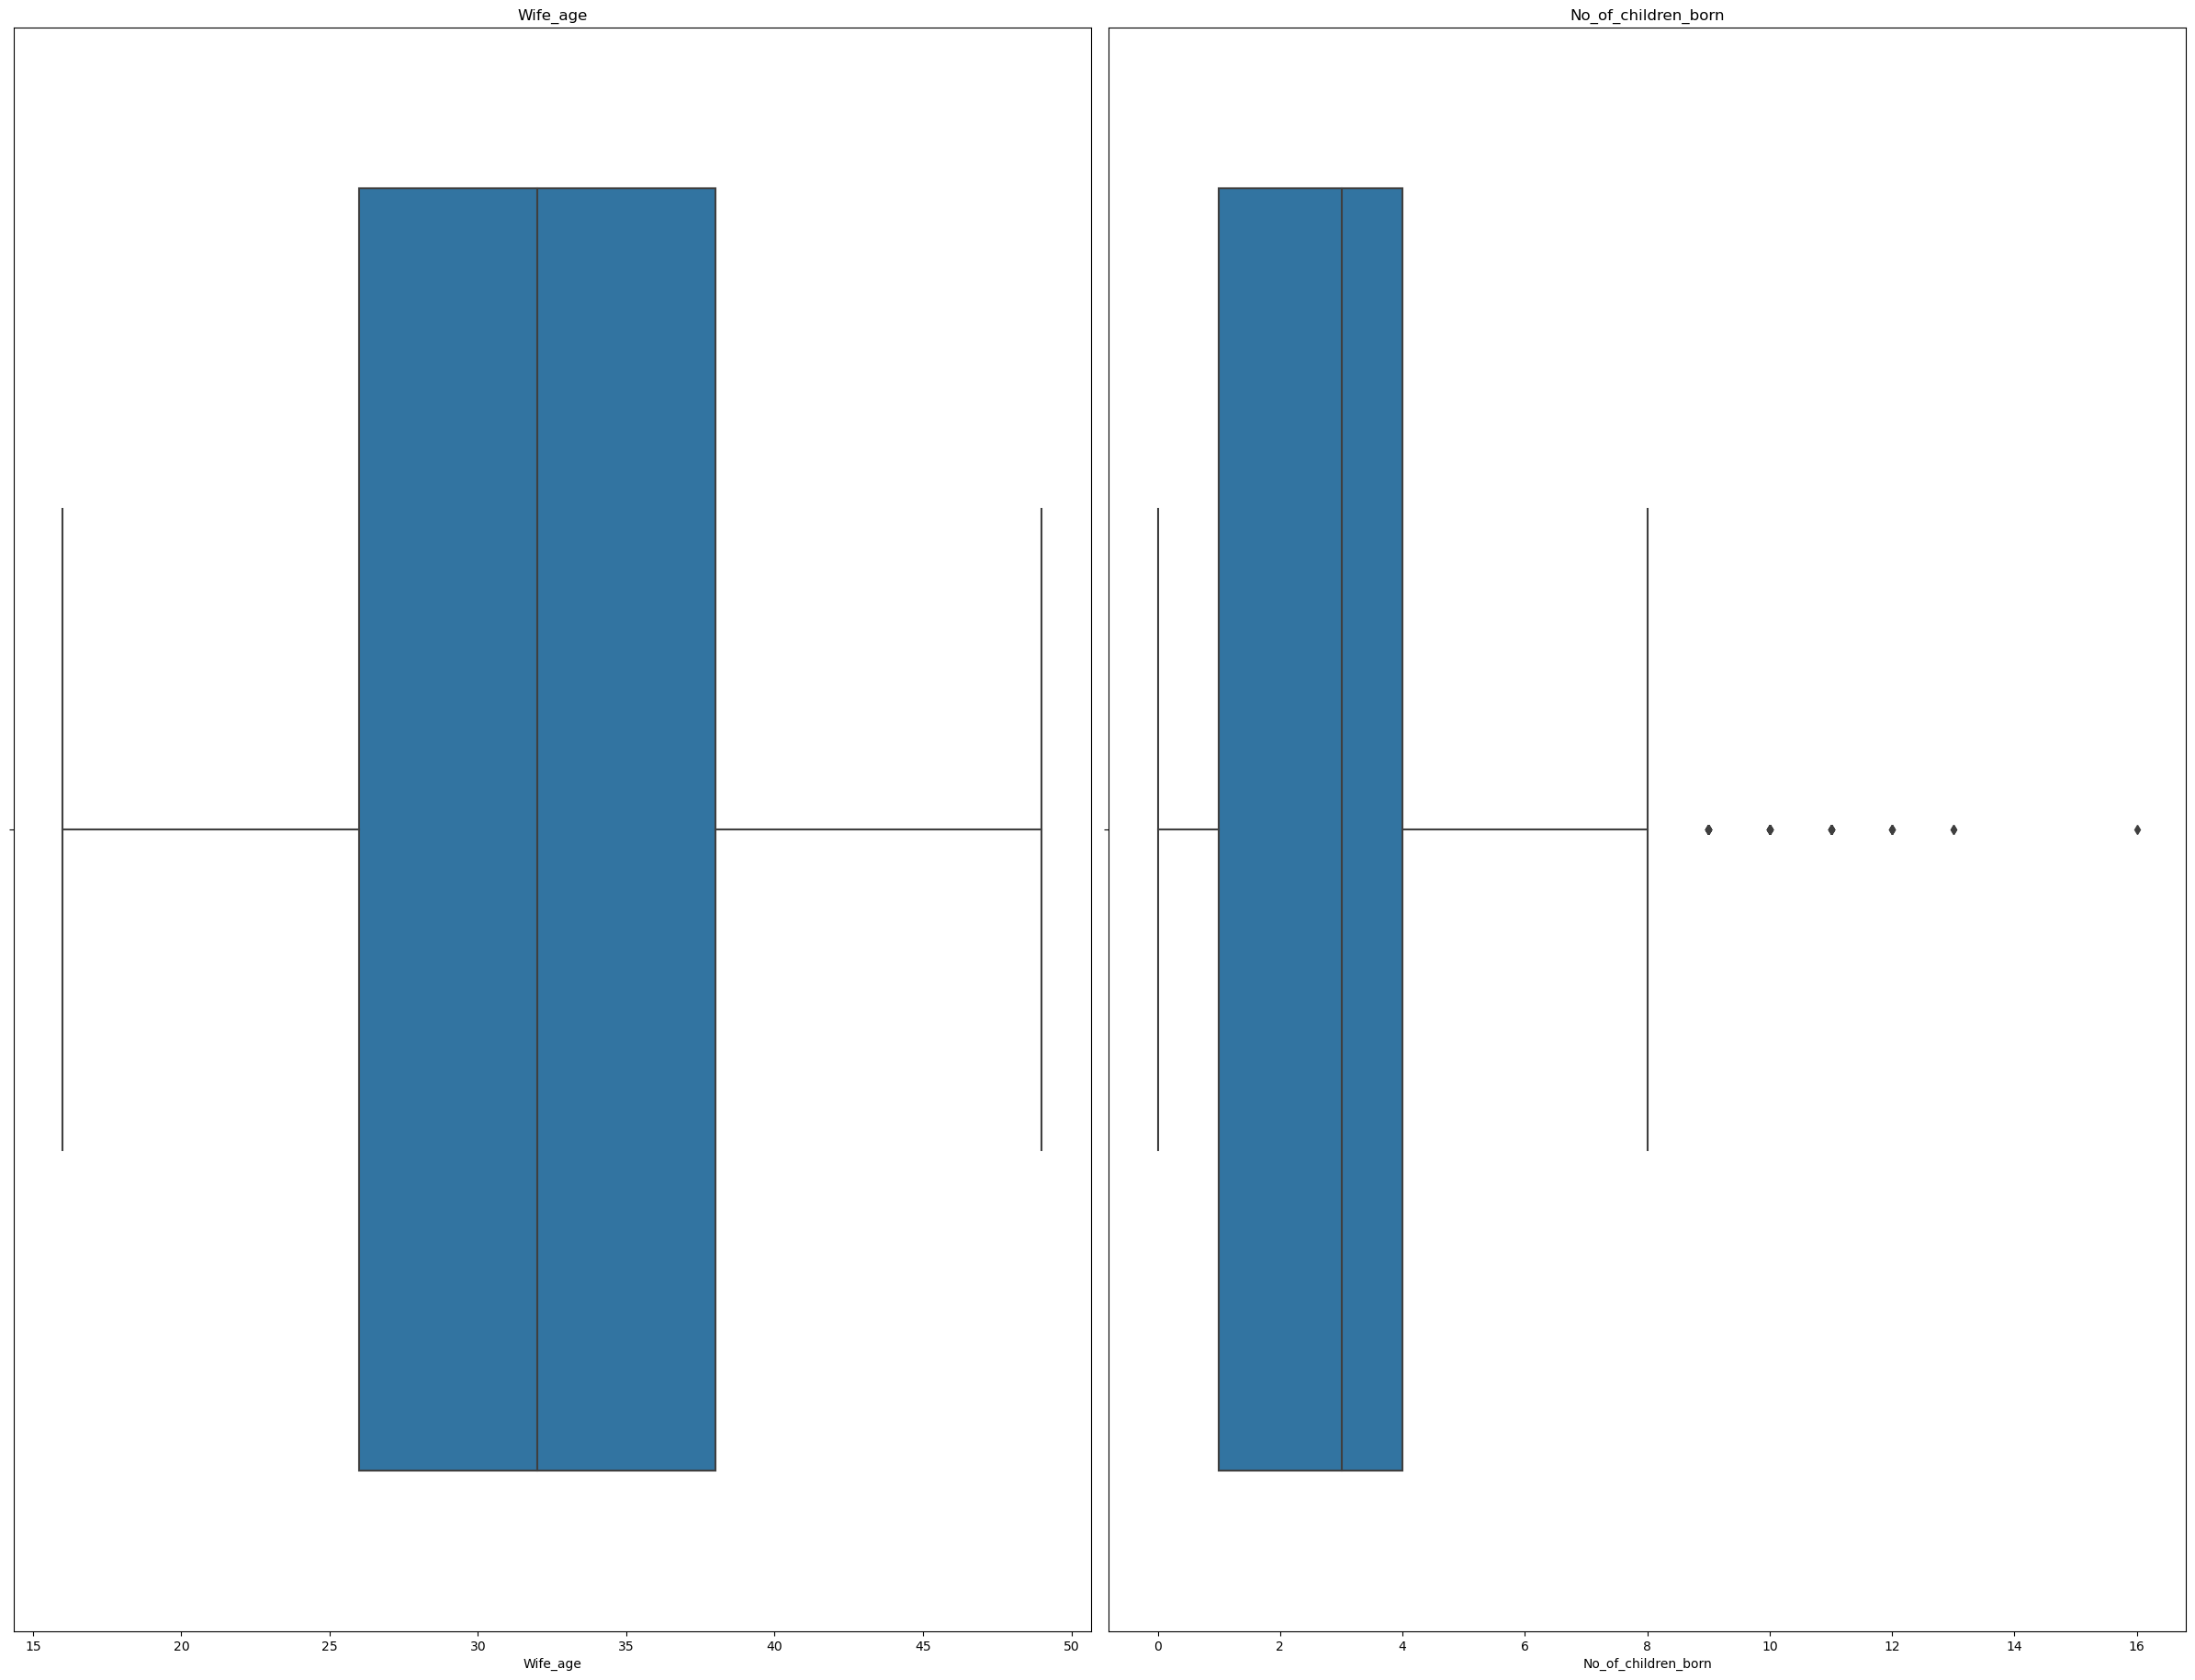

In [185]:
df_col = num.columns
a = len(df_col)
b = 2
c = 1 
fig = plt.figure(figsize=(24,36))
for i in df_col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.boxplot(num[i]);
    c = c + 1
plt.tight_layout()
plt.show()

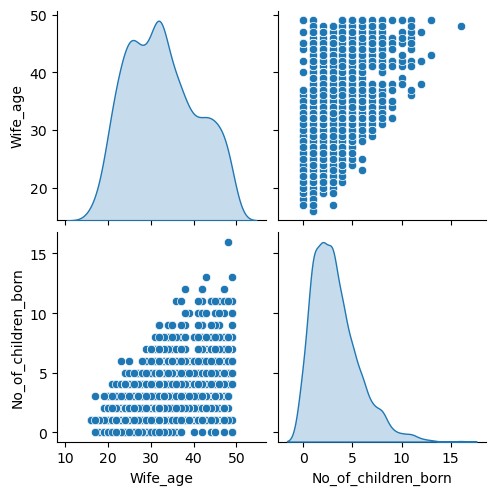

In [186]:
sns.pairplot(num, diag_kind = 'kde');

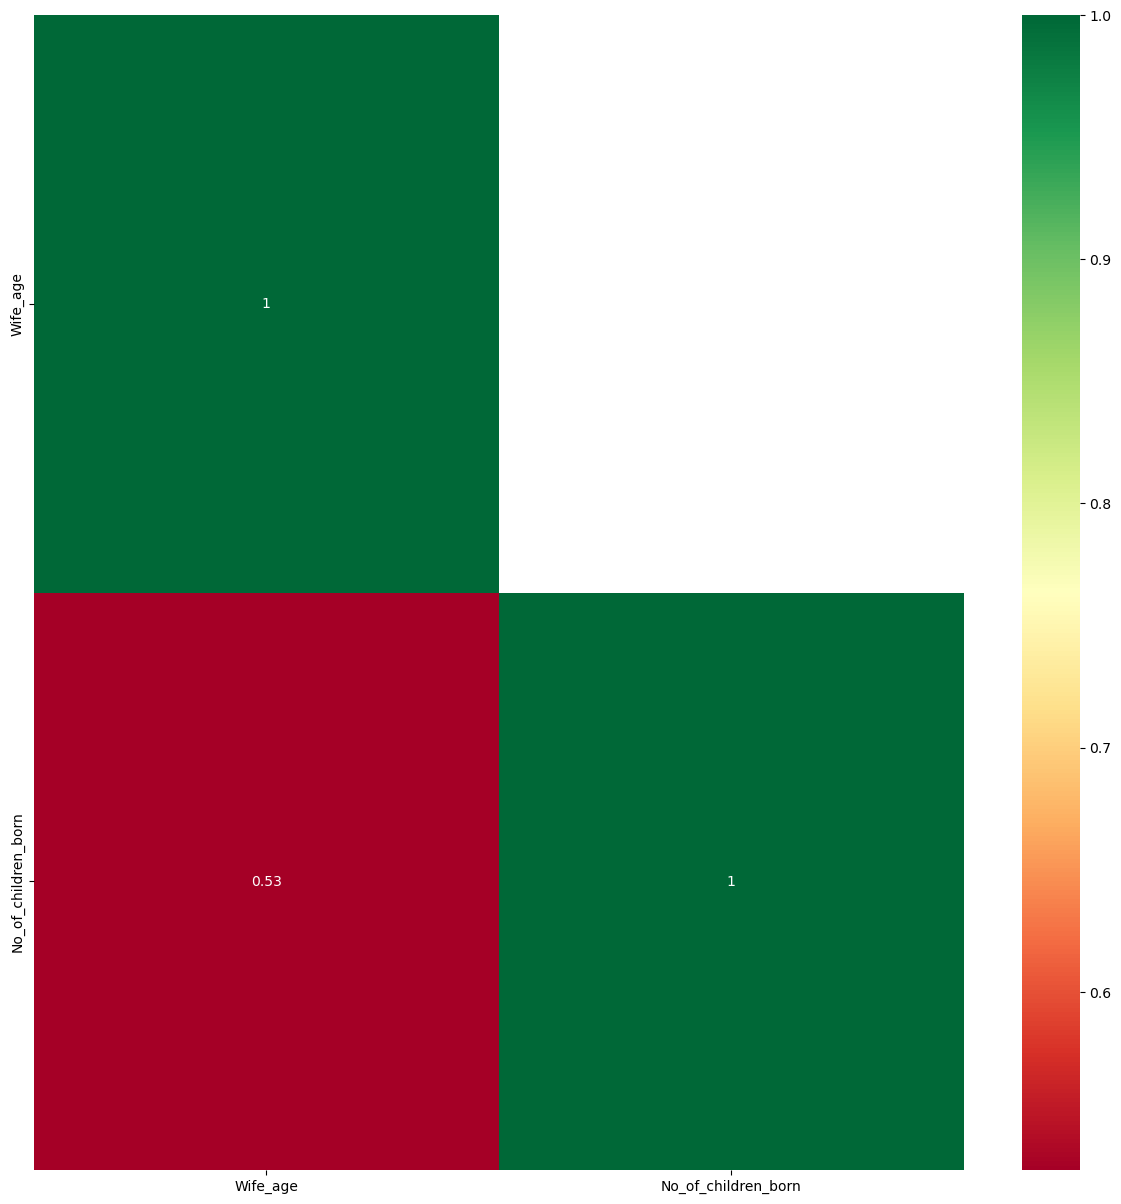

In [187]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(),annot=True,mask=np.triu(dataset.corr(),+1),cmap='RdYlGn');

In [188]:
import scipy.stats as stats

In [189]:
num.columns

Index(['Wife_age', 'No_of_children_born'], dtype='object')

In [190]:
for column in dataset[['Wife_age', 'No_of_children_born', 'Husband_Occupation']]:
    columnSeriesObj = dataset[column]
    print('Column Name : ', column)
    print('Minimum Value : ', columnSeriesObj.min())
    print('25% = ',columnSeriesObj.quantile(0.25))
    print('50% or Median= ',columnSeriesObj.quantile(0.5))
    print('75% = ',columnSeriesObj.quantile(0.75))
    print('Maximum Value = ',columnSeriesObj.max())
    print('IQR = ',stats.iqr(columnSeriesObj))
    print('----------------------------------')

Column Name :  Wife_age
Minimum Value :  16.0
25% =  26.0
50% or Median=  32.0
75% =  38.0
Maximum Value =  49.0
IQR =  12.0
----------------------------------
Column Name :  No_of_children_born
Minimum Value :  0.0
25% =  1.0
50% or Median=  3.0
75% =  4.0
Maximum Value =  16.0
IQR =  3.0
----------------------------------
Column Name :  Husband_Occupation
Minimum Value :  1
25% =  1.0
50% or Median=  2.0
75% =  3.0
Maximum Value =  4
IQR =  2.0
----------------------------------


In [191]:
def find_outliers_IQR(dataset):

   q1 = dataset.quantile(0.25)

   q3 = dataset.quantile(0.75)

   IQR=q3-q1

   outliers = dataset[((dataset<(q1-1.5*IQR)) | (dataset>(q3+1.5*IQR)))]

   return outliers

In [192]:
outliers = find_outliers_IQR(dataset[['Wife_age', 'No_of_children_born', 'Husband_Occupation']])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 1473
max outlier value: Wife_age                NaN
No_of_children_born    16.0
Husband_Occupation     None
dtype: object
min outlier value: Wife_age                NaN
No_of_children_born     9.0
Husband_Occupation     None
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_18500\573581645.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = dataset[((dataset<(q1-1.5*IQR)) | (dataset>(q3+1.5*IQR)))]


,Wife_age,No_of_children_born,Husband_Occupation
0,NaN,NaN,NaN
1,NaN,10.0,NaN
2,NaN,NaN,NaN
3,NaN,9.0,NaN
4,NaN,NaN,NaN
...,...,...,...
1468,NaN,NaN,NaN
1469,NaN,NaN,NaN
1470,NaN,NaN,NaN
1471,NaN,NaN,NaN


In [193]:
   q1 = dataset["No_of_children_born"].quantile(0.25)

   q3 = dataset["No_of_children_born"].quantile(0.75)

In [194]:
q1

1.0

In [195]:
q3

4.0

In [196]:
IQR = q3 - q1

In [197]:
lower_limit = q1-1.5*IQR
lower_limit

-3.5

In [198]:
upper_limit = q3+1.5*IQR
upper_limit

8.5

In [199]:
dataset["No_of_children_born"] = np.where(dataset["No_of_children_born"]>upper_limit,upper_limit,np.where(dataset["No_of_children_born"]<lower_limit,lower_limit,dataset["No_of_children_born"])) 

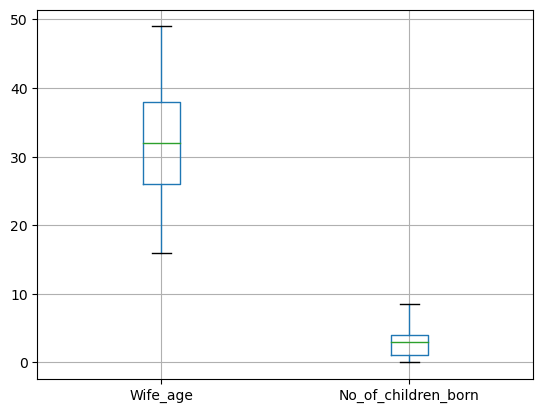

In [200]:
dataset.boxplot();

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

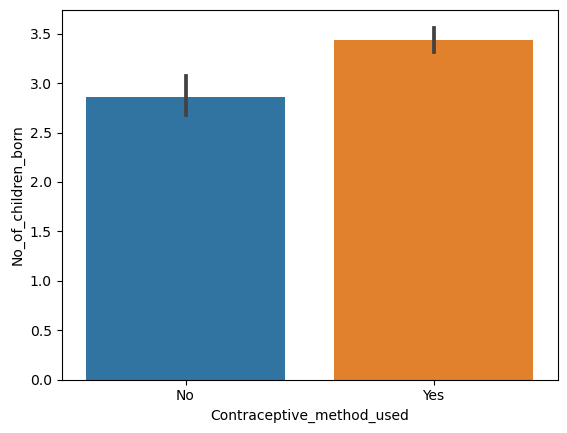

In [201]:
sns.barplot(x=dataset['Contraceptive_method_used'],y=dataset['No_of_children_born'],data=dataset )

<AxesSubplot:xlabel='Wife_religion', ylabel='No_of_children_born'>

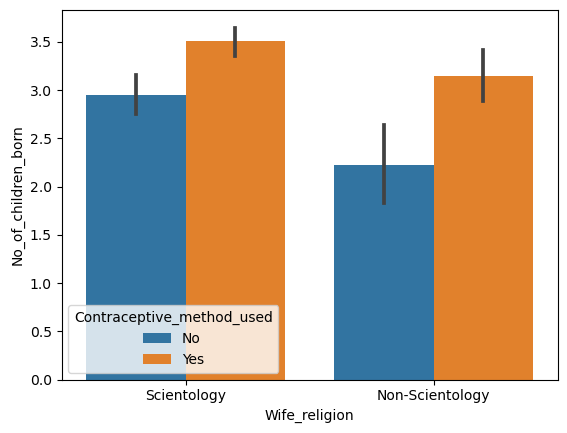

In [202]:
sns.barplot(x=dataset['Wife_religion'],y=dataset['No_of_children_born'],hue = dataset['Contraceptive_method_used'],data=dataset)

<AxesSubplot:xlabel='Standard_of_living_index', ylabel='No_of_children_born'>

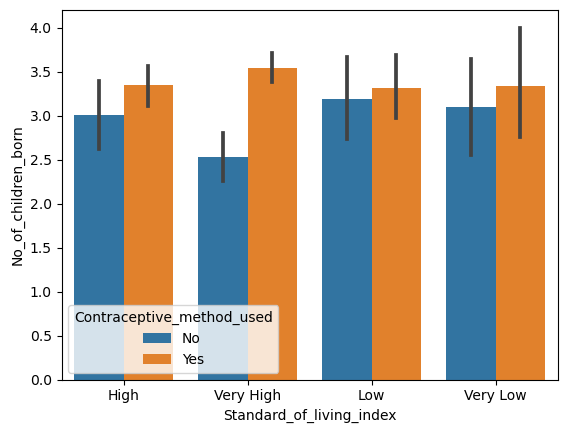

In [203]:
sns.barplot(x=dataset['Standard_of_living_index'],y=dataset['No_of_children_born'],hue = dataset['Contraceptive_method_used'],data=dataset)

In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), object(8)
memory usage: 115.2+ KB


In [205]:
dataset.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education', 'No_of_children_born', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ', 'Contraceptive_method_used'], dtype='object')

### Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and build multiple models with different predictors.

In [206]:
from sklearn.preprocessing import LabelEncoder

In [207]:
LE = LabelEncoder()

In [208]:
dataset['Contraceptive_method_used'] = LE.fit_transform(dataset['Contraceptive_method_used'])
dataset.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,0
1,45.0,Uneducated,Secondary,8.5,Scientology,No,3,Very High,Exposed,0
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,0
3,42.0,Secondary,Primary,8.5,Scientology,No,3,High,Exposed,0
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,0


In [209]:
dataset.rename(columns={'Wife_ education':'Wife_education','Media_exposure ':'Media_exposure'},inplace=True)

In [210]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_education             1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   object 
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 109.4+ KB


In [211]:
dataset_dummy = pd.get_dummies(dataset,drop_first=True)
dataset_dummy.head()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Wife_age,No_of_children_born,Contraceptive_method_used,Wife_education_Secondary,Wife_education_Tertiary,Wife_education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Husband_Occupation_2,Husband_Occupation_3,Husband_Occupation_4,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure_Not-Exposed
0,24.0,3.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,45.0,8.5,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,43.0,7.0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,42.0,8.5,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,36.0,8.0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0


In [212]:
dataset_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Wife_age                            1473 non-null   float64
 1   No_of_children_born                 1473 non-null   float64
 2   Contraceptive_method_used           1473 non-null   int32  
 3   Wife_education_Secondary            1473 non-null   uint8  
 4   Wife_education_Tertiary             1473 non-null   uint8  
 5   Wife_education_Uneducated           1473 non-null   uint8  
 6   Husband_education_Secondary         1473 non-null   uint8  
 7   Husband_education_Tertiary          1473 non-null   uint8  
 8   Husband_education_Uneducated        1473 non-null   uint8  
 9   Wife_religion_Scientology           1473 non-null   uint8  
 10  Wife_Working_Yes                    1473 non-null   uint8  
 11  Husband_Occupation_2                1473 no

In [213]:
import statsmodels.formula.api as sm

In [214]:
dataset_dummy.columns

Index(['Wife_age', 'No_of_children_born', 'Contraceptive_method_used', 'Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very High', 'Standard_of_living_index_Very Low', 'Media_exposure_Not-Exposed'], dtype='object')

In [215]:
dataset_dummy.rename(columns={'Standard_of_living_index_Very High':'Standard_of_living_index_Very_High','Standard_of_living_index_Very Low':'Standard_of_living_index_Very_Low','Media_exposure_Not-Exposed':'Media_exposure_Not_Exposed'},inplace=True)

In [216]:
formula_1 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Secondary + Wife_education_Tertiary + Wife_education_Uneducated + Husband_education_Secondary + Husband_education_Tertiary + Husband_education_Uneducated + Wife_religion_Scientology + Wife_Working_Yes + Husband_Occupation_2 + Husband_Occupation_3 + Husband_Occupation_4 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [217]:
Logistic_1 = sm.logit(formula=formula_1,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.595433
         Iterations 5


In [218]:
print(Logistic_1.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1455
Method:                                  MLE   Df Model:                           17
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1275
Time:                               11:37:18   Log-Likelihood:                -877.07
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 1.039e-44
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.7217      0.436      3.947      0.000       0.867       2.577
Wif

In [219]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [220]:
vif_cal(input_data=dataset_dummy.drop('Contraceptive_method_used',axis=1))

Wife_age  VIF =  1.66
No_of_children_born  VIF =  1.54
Wife_education_Secondary  VIF =  1.77
Wife_education_Tertiary  VIF =  2.62
Wife_education_Uneducated  VIF =  1.58
Husband_education_Secondary  VIF =  2.52
Husband_education_Tertiary  VIF =  3.59
Husband_education_Uneducated  VIF =  1.25
Wife_religion_Scientology  VIF =  1.15
Wife_Working_Yes  VIF =  1.04
Husband_Occupation_2  VIF =  1.72
Husband_Occupation_3  VIF =  1.93
Husband_Occupation_4  VIF =  1.12
Standard_of_living_index_Low  VIF =  1.36
Standard_of_living_index_Very_High  VIF =  1.51
Standard_of_living_index_Very_Low  VIF =  1.29
Media_exposure_Not_Exposed  VIF =  1.27


In [221]:
formula_2 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Secondary + Wife_education_Tertiary + Wife_education_Uneducated + Husband_education_Secondary + Husband_education_Uneducated + Wife_religion_Scientology + Wife_Working_Yes + Husband_Occupation_2 + Husband_Occupation_3 + Husband_Occupation_4 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [222]:
Logistic_2 = sm.logit(formula=formula_2,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.595439
         Iterations 5


In [223]:
print(Logistic_2.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1456
Method:                                  MLE   Df Model:                           16
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1275
Time:                               11:37:19   Log-Likelihood:                -877.08
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 2.567e-45
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.6988      0.401      4.239      0.000       0.913       2.484
Wif

In [224]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary'],axis=1))

Wife_age  VIF =  1.66
No_of_children_born  VIF =  1.53
Wife_education_Secondary  VIF =  1.66
Wife_education_Tertiary  VIF =  2.32
Wife_education_Uneducated  VIF =  1.55
Husband_education_Secondary  VIF =  1.22
Husband_education_Uneducated  VIF =  1.14
Wife_religion_Scientology  VIF =  1.14
Wife_Working_Yes  VIF =  1.04
Husband_Occupation_2  VIF =  1.69
Husband_Occupation_3  VIF =  1.9
Husband_Occupation_4  VIF =  1.11
Standard_of_living_index_Low  VIF =  1.35
Standard_of_living_index_Very_High  VIF =  1.51
Standard_of_living_index_Very_Low  VIF =  1.28
Media_exposure_Not_Exposed  VIF =  1.26


In [225]:
formula_3 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Secondary + Wife_education_Uneducated + Husband_education_Secondary + Husband_education_Uneducated + Wife_religion_Scientology + Wife_Working_Yes + Husband_Occupation_2 + Husband_Occupation_3 + Husband_Occupation_4 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [226]:
Logistic_3 = sm.logit(formula=formula_3,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.611902
         Iterations 5


In [227]:
print(Logistic_3.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1457
Method:                                  MLE   Df Model:                           15
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1034
Time:                               11:37:19   Log-Likelihood:                -901.33
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 5.365e-36
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.7146      0.369      7.351      0.000       1.991       3.438
Wif

In [228]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary','Wife_education_Tertiary'],axis=1))

Wife_age  VIF =  1.66
No_of_children_born  VIF =  1.5
Wife_education_Secondary  VIF =  1.13
Wife_education_Uneducated  VIF =  1.41
Husband_education_Secondary  VIF =  1.16
Husband_education_Uneducated  VIF =  1.14
Wife_religion_Scientology  VIF =  1.12
Wife_Working_Yes  VIF =  1.04
Husband_Occupation_2  VIF =  1.6
Husband_Occupation_3  VIF =  1.75
Husband_Occupation_4  VIF =  1.09
Standard_of_living_index_Low  VIF =  1.35
Standard_of_living_index_Very_High  VIF =  1.5
Standard_of_living_index_Very_Low  VIF =  1.26
Media_exposure_Not_Exposed  VIF =  1.26


In [229]:
formula_4 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Secondary + Wife_education_Uneducated + Husband_education_Secondary + Husband_education_Uneducated + Wife_religion_Scientology + Wife_Working_Yes + Husband_Occupation_2 + Husband_Occupation_3 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [230]:
Logistic_4 = sm.logit(formula=formula_4,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.611908
         Iterations 5


In [231]:
print(Logistic_4.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1458
Method:                                  MLE   Df Model:                           14
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1034
Time:                               11:37:20   Log-Likelihood:                -901.34
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 1.372e-36
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.7206      0.367      7.420      0.000       2.002       3.439
Wif

In [232]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary','Wife_education_Tertiary',
                                      'Husband_Occupation_4'],axis=1))

Wife_age  VIF =  1.65
No_of_children_born  VIF =  1.5
Wife_education_Secondary  VIF =  1.13
Wife_education_Uneducated  VIF =  1.39
Husband_education_Secondary  VIF =  1.15
Husband_education_Uneducated  VIF =  1.13
Wife_religion_Scientology  VIF =  1.12
Wife_Working_Yes  VIF =  1.03
Husband_Occupation_2  VIF =  1.53
Husband_Occupation_3  VIF =  1.66
Standard_of_living_index_Low  VIF =  1.34
Standard_of_living_index_Very_High  VIF =  1.5
Standard_of_living_index_Very_Low  VIF =  1.26
Media_exposure_Not_Exposed  VIF =  1.26


In [233]:
formula_5 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Secondary + Wife_education_Uneducated + Husband_education_Uneducated + Wife_religion_Scientology + Wife_Working_Yes + Husband_Occupation_2 + Husband_Occupation_3 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [234]:
Logistic_5 = sm.logit(formula=formula_5,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.612000
         Iterations 5


In [235]:
print(Logistic_5.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1459
Method:                                  MLE   Df Model:                           13
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1032
Time:                               11:37:21   Log-Likelihood:                -901.48
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 3.807e-37
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.7265      0.366      7.440      0.000       2.008       3.445
Wif

In [236]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary','Wife_education_Tertiary',
                                      'Husband_Occupation_4','Husband_education_Secondary'],axis=1))

Wife_age  VIF =  1.65
No_of_children_born  VIF =  1.5
Wife_education_Secondary  VIF =  1.1
Wife_education_Uneducated  VIF =  1.39
Husband_education_Uneducated  VIF =  1.11
Wife_religion_Scientology  VIF =  1.11
Wife_Working_Yes  VIF =  1.03
Husband_Occupation_2  VIF =  1.49
Husband_Occupation_3  VIF =  1.6
Standard_of_living_index_Low  VIF =  1.34
Standard_of_living_index_Very_High  VIF =  1.5
Standard_of_living_index_Very_Low  VIF =  1.26
Media_exposure_Not_Exposed  VIF =  1.25


In [237]:
formula_6 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Secondary + Wife_education_Uneducated + Husband_education_Uneducated + Wife_religion_Scientology + Husband_Occupation_2 + Husband_Occupation_3 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [238]:
Logistic_6 = sm.logit(formula=formula_6,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.612146
         Iterations 5


In [239]:
print(Logistic_6.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1460
Method:                                  MLE   Df Model:                           12
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1030
Time:                               11:37:22   Log-Likelihood:                -901.69
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 1.094e-37
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.7117      0.366      7.414      0.000       1.995       3.429
Wif

In [240]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary','Wife_education_Tertiary',
                                      'Husband_Occupation_4','Husband_education_Secondary','Wife_Working_Yes'],axis=1))

Wife_age  VIF =  1.64
No_of_children_born  VIF =  1.47
Wife_education_Secondary  VIF =  1.1
Wife_education_Uneducated  VIF =  1.39
Husband_education_Uneducated  VIF =  1.11
Wife_religion_Scientology  VIF =  1.11
Husband_Occupation_2  VIF =  1.49
Husband_Occupation_3  VIF =  1.6
Standard_of_living_index_Low  VIF =  1.34
Standard_of_living_index_Very_High  VIF =  1.5
Standard_of_living_index_Very_Low  VIF =  1.26
Media_exposure_Not_Exposed  VIF =  1.25


In [241]:
formula_7 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Uneducated + Husband_education_Uneducated + Wife_religion_Scientology + Husband_Occupation_2 + Husband_Occupation_3 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [242]:
Logistic_7 = sm.logit(formula=formula_7,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.612578
         Iterations 5


In [243]:
print(Logistic_7.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1461
Method:                                  MLE   Df Model:                           11
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1024
Time:                               11:37:23   Log-Likelihood:                -902.33
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 4.511e-38
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.6731      0.364      7.345      0.000       1.960       3.386
Wif

In [244]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary','Wife_education_Tertiary',
                                      'Husband_Occupation_4','Husband_education_Secondary','Wife_Working_Yes','Wife_education_Secondary'],axis=1))

Wife_age  VIF =  1.64
No_of_children_born  VIF =  1.47
Wife_education_Uneducated  VIF =  1.32
Husband_education_Uneducated  VIF =  1.11
Wife_religion_Scientology  VIF =  1.11
Husband_Occupation_2  VIF =  1.47
Husband_Occupation_3  VIF =  1.58
Standard_of_living_index_Low  VIF =  1.34
Standard_of_living_index_Very_High  VIF =  1.49
Standard_of_living_index_Very_Low  VIF =  1.26
Media_exposure_Not_Exposed  VIF =  1.25


In [245]:
formula_8 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Uneducated + Wife_religion_Scientology + Husband_Occupation_2 + Husband_Occupation_3 + Standard_of_living_index_Low + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [246]:
Logistic_8 = sm.logit(formula=formula_8,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.613092
         Iterations 5


In [247]:
print(Logistic_8.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1462
Method:                                  MLE   Df Model:                           10
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1016
Time:                               11:37:24   Log-Likelihood:                -903.08
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 1.999e-38
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.6977      0.363      7.424      0.000       1.985       3.410
Wif

In [248]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary','Wife_education_Tertiary',
                                      'Husband_Occupation_4','Husband_education_Secondary','Wife_Working_Yes','Wife_education_Secondary',
                                      'Husband_education_Uneducated'],axis=1))

Wife_age  VIF =  1.63
No_of_children_born  VIF =  1.47
Wife_education_Uneducated  VIF =  1.27
Wife_religion_Scientology  VIF =  1.11
Husband_Occupation_2  VIF =  1.46
Husband_Occupation_3  VIF =  1.57
Standard_of_living_index_Low  VIF =  1.34
Standard_of_living_index_Very_High  VIF =  1.48
Standard_of_living_index_Very_Low  VIF =  1.25
Media_exposure_Not_Exposed  VIF =  1.25


In [249]:
formula_9 = 'Contraceptive_method_used ~ Wife_age+ No_of_children_born + Wife_education_Uneducated + Wife_religion_Scientology + Husband_Occupation_2 + Husband_Occupation_3 + Standard_of_living_index_Very_High + Standard_of_living_index_Very_Low + Media_exposure_Not_Exposed'

In [250]:
Logistic_9 = sm.logit(formula=formula_9,data=dataset_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.613806
         Iterations 5


In [251]:
print(Logistic_9.summary())

                               Logit Regression Results                              
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1463
Method:                                  MLE   Df Model:                            9
Date:                       Sun, 12 Feb 2023   Pseudo R-squ.:                  0.1006
Time:                               11:37:24   Log-Likelihood:                -904.14
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 1.121e-38
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              2.6160      0.358      7.298      0.000       1.913       3.318
Wif

In [252]:
vif_cal(input_data=dataset_dummy.drop(['Contraceptive_method_used','Husband_education_Tertiary','Wife_education_Tertiary',
                                      'Husband_Occupation_4','Husband_education_Secondary','Wife_Working_Yes','Wife_education_Secondary',
                                      'Husband_education_Uneducated','Standard_of_living_index_Low'],axis=1))

Wife_age  VIF =  1.63
No_of_children_born  VIF =  1.47
Wife_education_Uneducated  VIF =  1.27
Wife_religion_Scientology  VIF =  1.11
Husband_Occupation_2  VIF =  1.46
Husband_Occupation_3  VIF =  1.57
Standard_of_living_index_Very_High  VIF =  1.24
Standard_of_living_index_Very_Low  VIF =  1.13
Media_exposure_Not_Exposed  VIF =  1.23


### Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
Train,Test = train_test_split(dataset_dummy,test_size=0.3,random_state=1,stratify=dataset_dummy['Contraceptive_method_used'])

In [293]:
Train.columns

Index(['Wife_age', 'No_of_children_born', 'Contraceptive_method_used', 'Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very_High', 'Standard_of_living_index_Very_Low', 'Media_exposure_Not_Exposed'], dtype='object')

In [294]:
from sklearn.linear_model import LogisticRegression

In [295]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

In [296]:
model_1 = LR.fit(Train[['Wife_age', 'No_of_children_born','Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very_High', 'Standard_of_living_index_Very_Low', 'Media_exposure_Not_Exposed']],Train['Contraceptive_method_used'])

In [297]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Wife_age', 'No_of_children_born','Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very_High', 'Standard_of_living_index_Very_Low', 'Media_exposure_Not_Exposed']],Train['Contraceptive_method_used']))

Accuracy Score of Model 1: 0.6973811833171678


In [298]:
model_1_test_class = model_1.predict(Test[['Wife_age', 'No_of_children_born','Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very_High', 'Standard_of_living_index_Very_Low', 'Media_exposure_Not_Exposed']])
model_1_test_probabilities = model_1.predict_proba(Test[['Wife_age', 'No_of_children_born','Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very_High', 'Standard_of_living_index_Very_Low', 'Media_exposure_Not_Exposed']])

In [299]:
model_1_train_class = model_1.predict(Train[['Wife_age', 'No_of_children_born','Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very_High', 'Standard_of_living_index_Very_Low', 'Media_exposure_Not_Exposed']])
model_1_train_probabilities = model_1.predict_proba(Train[['Wife_age', 'No_of_children_born','Wife_education_Secondary', 'Wife_education_Tertiary', 'Wife_education_Uneducated', 'Husband_education_Secondary', 'Husband_education_Tertiary', 'Husband_education_Uneducated', 'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2', 'Husband_Occupation_3', 'Husband_Occupation_4', 'Standard_of_living_index_Low', 'Standard_of_living_index_Very_High', 'Standard_of_living_index_Very_Low', 'Media_exposure_Not_Exposed']])

In [300]:
model_2 = LR.fit(Train[['Wife_age', 'No_of_children_born' , 'Wife_education_Uneducated' , 'Wife_religion_Scientology'  ,'Husband_Occupation_2' , 'Husband_Occupation_3' , 'Standard_of_living_index_Very_High' , 'Standard_of_living_index_Very_Low' , 'Media_exposure_Not_Exposed']],Train['Contraceptive_method_used'])

In [301]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Wife_age', 'No_of_children_born' , 'Wife_education_Uneducated' , 'Wife_religion_Scientology'  ,'Husband_Occupation_2' , 'Husband_Occupation_3' , 'Standard_of_living_index_Very_High' , 'Standard_of_living_index_Very_Low' , 'Media_exposure_Not_Exposed']],Train['Contraceptive_method_used']))

Accuracy Score of Model 1: 0.6867119301648884


In [302]:
model_2_test_class = model_1.predict(Test[['Wife_age', 'No_of_children_born' , 'Wife_education_Uneducated' , 'Wife_religion_Scientology'  ,'Husband_Occupation_2' , 'Husband_Occupation_3' , 'Standard_of_living_index_Very_High' , 'Standard_of_living_index_Very_Low' , 'Media_exposure_Not_Exposed']])
model_2_test_probabilities = model_1.predict_proba(Test[['Wife_age', 'No_of_children_born' , 'Wife_education_Uneducated' , 'Wife_religion_Scientology'  ,'Husband_Occupation_2' , 'Husband_Occupation_3' , 'Standard_of_living_index_Very_High' , 'Standard_of_living_index_Very_Low' , 'Media_exposure_Not_Exposed']])

In [303]:
model_2_train_class = model_1.predict(Train[['Wife_age', 'No_of_children_born' , 'Wife_education_Uneducated' , 'Wife_religion_Scientology'  ,'Husband_Occupation_2' , 'Husband_Occupation_3' , 'Standard_of_living_index_Very_High' , 'Standard_of_living_index_Very_Low' , 'Media_exposure_Not_Exposed']])
model_2_train_probabilities = model_1.predict_proba(Train[['Wife_age', 'No_of_children_born' , 'Wife_education_Uneducated' , 'Wife_religion_Scientology'  ,'Husband_Occupation_2' , 'Husband_Occupation_3' , 'Standard_of_living_index_Very_High' , 'Standard_of_living_index_Very_Low' , 'Media_exposure_Not_Exposed']])

In [304]:
from sklearn import metrics

In [305]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

In [333]:
from sklearn.metrics import accuracy_score,confusion_matrix

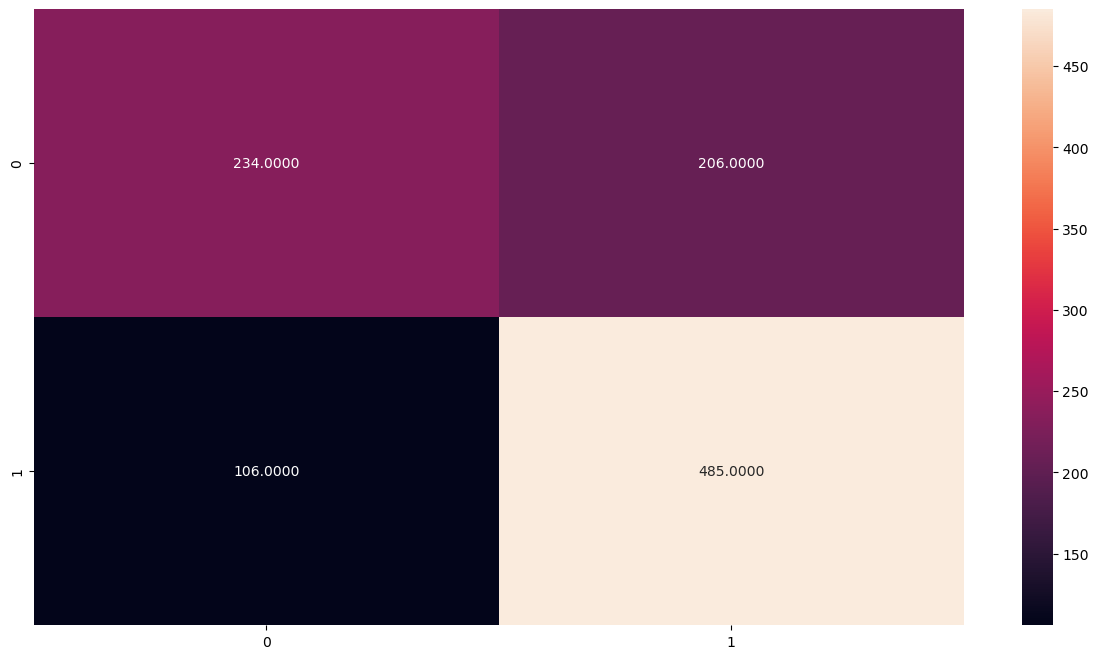

In [334]:
sns.heatmap(confusion_matrix(Train['Contraceptive_method_used'],model_1_train_class),annot=True,fmt='.4f');

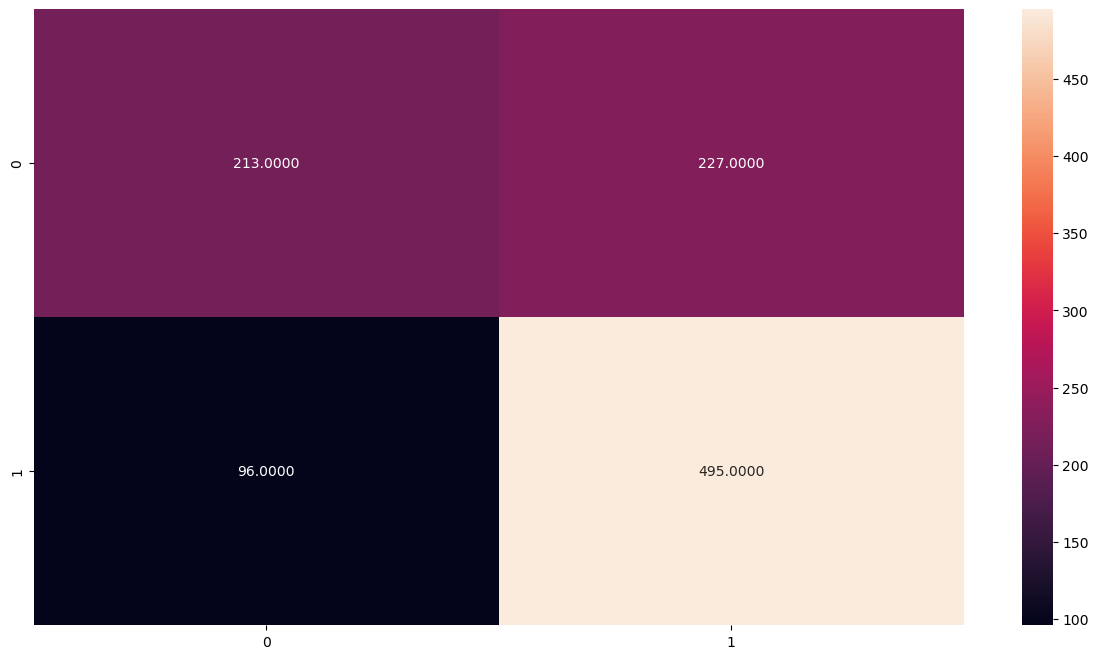

In [335]:
sns.heatmap(confusion_matrix(Train['Contraceptive_method_used'],model_2_train_class),annot=True,fmt='.4f');

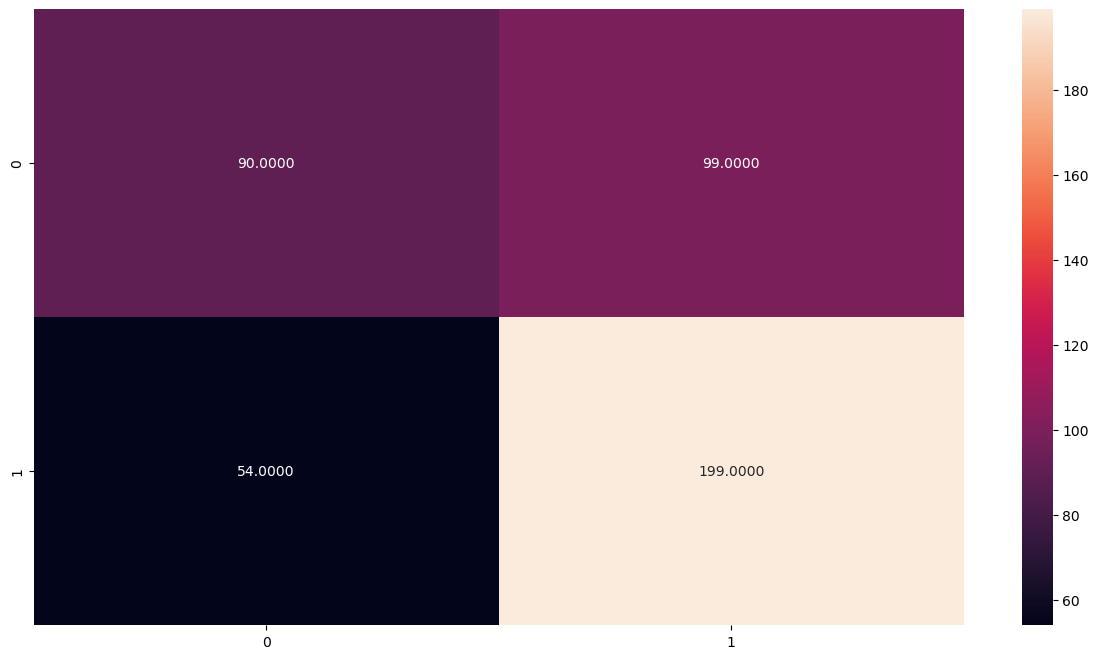

In [336]:
sns.heatmap(confusion_matrix(Test['Contraceptive_method_used'],model_1_test_class),annot=True,fmt='.4f');

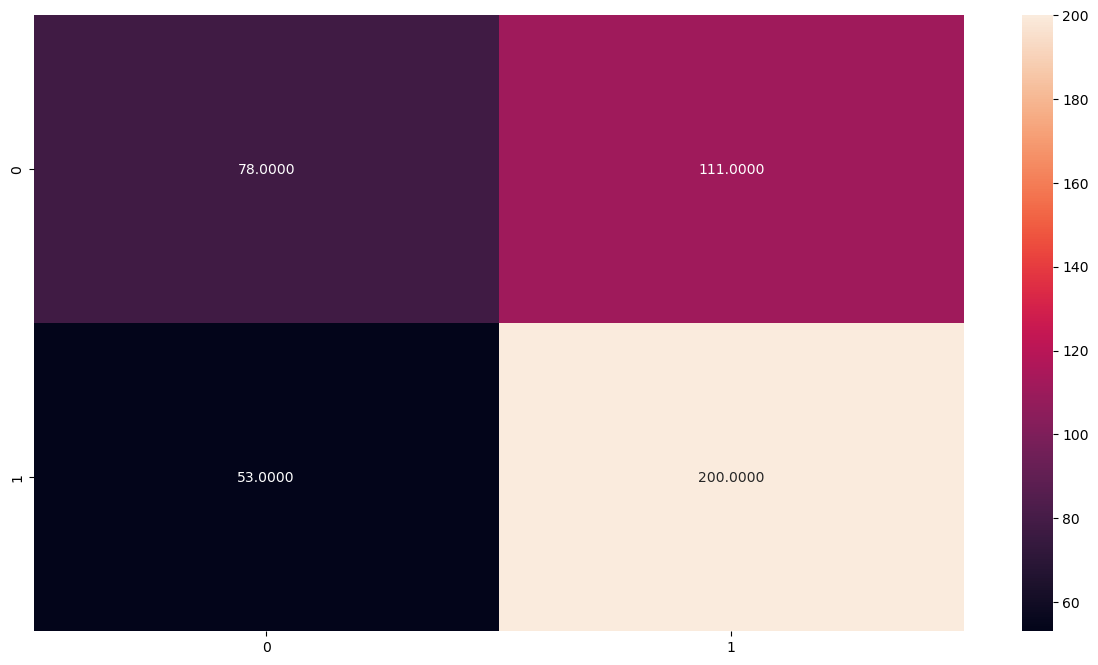

In [337]:
sns.heatmap(confusion_matrix(Test['Contraceptive_method_used'],model_2_test_class),annot=True,fmt='.4f');

In [307]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Contraceptive_method_used'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Contraceptive_method_used'],model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

Model 1
True Negative: 90 
False Positives: 99 
False Negatives: 54 
True Positives: 199 


Model 2
True Negative: 78 
False Positives: 111 
False Negatives: 53 
True Positives: 200 




In [308]:
print('Model 1')
print(metrics.classification_report(Test['Contraceptive_method_used'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Contraceptive_method_used'],model_2_test_class),'\n')

Model 1
              precision    recall  f1-score   support

           0       0.62      0.48      0.54       189
           1       0.67      0.79      0.72       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.65      0.64       442
 

Model 2
              precision    recall  f1-score   support

           0       0.60      0.41      0.49       189
           1       0.64      0.79      0.71       253

    accuracy                           0.63       442
   macro avg       0.62      0.60      0.60       442
weighted avg       0.62      0.63      0.61       442
 



In [309]:
print('Model 1')
print(metrics.classification_report(Train['Contraceptive_method_used'],model_1_train_class),'\n')

print('Model 2')
print(metrics.classification_report(Train['Contraceptive_method_used'],model_2_train_class),'\n')

Model 1
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       440
           1       0.70      0.82      0.76       591

    accuracy                           0.70      1031
   macro avg       0.70      0.68      0.68      1031
weighted avg       0.70      0.70      0.69      1031
 

Model 2
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       440
           1       0.69      0.84      0.75       591

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.66      1031
weighted avg       0.69      0.69      0.67      1031
 



In [310]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.68696


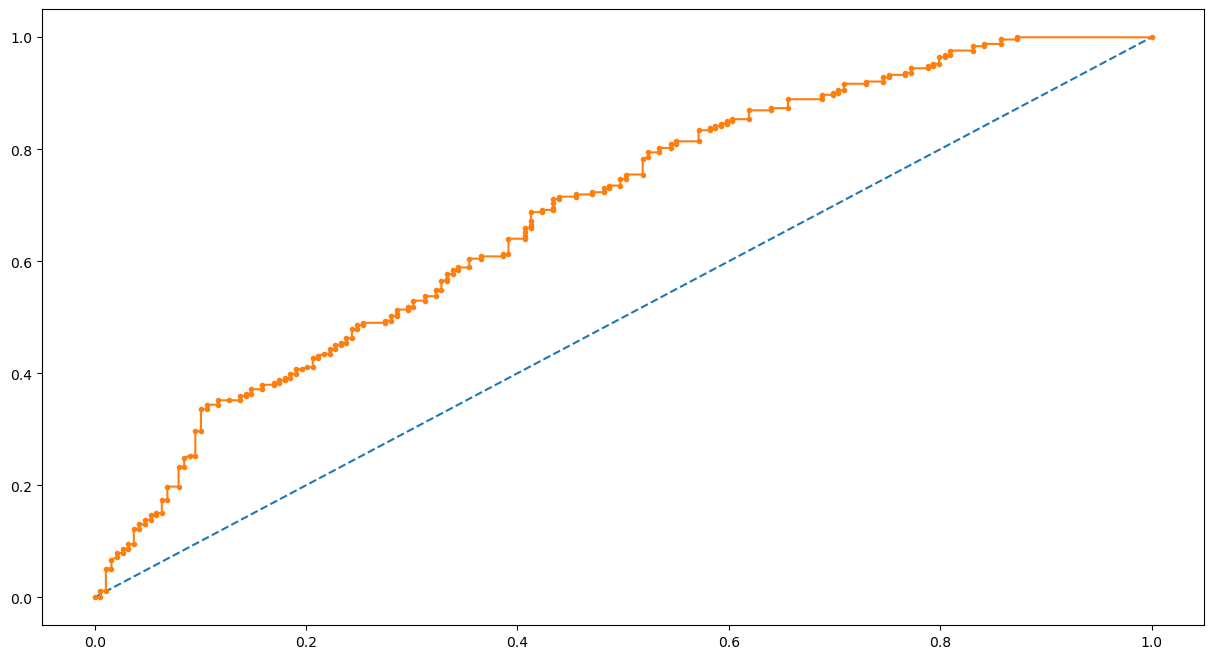

Model 3 AUC: 0.64401


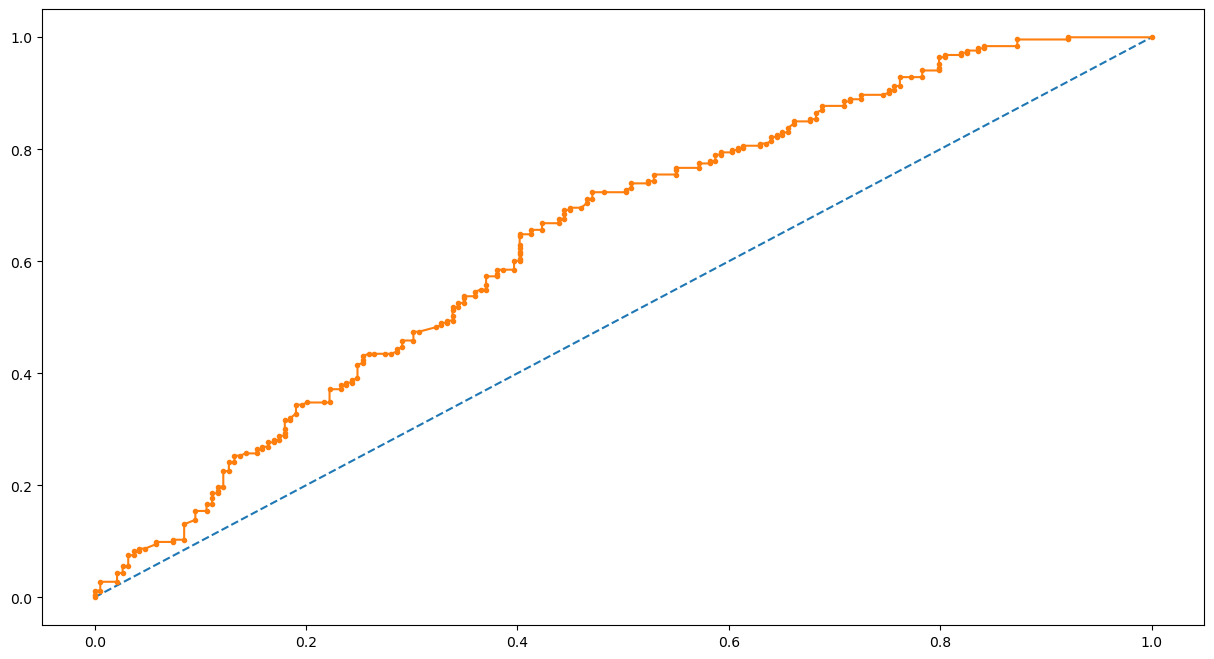

In [311]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Contraceptive_method_used'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Contraceptive_method_used'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Contraceptive_method_used'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Contraceptive_method_used'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Model 1 AUC: 0.73127


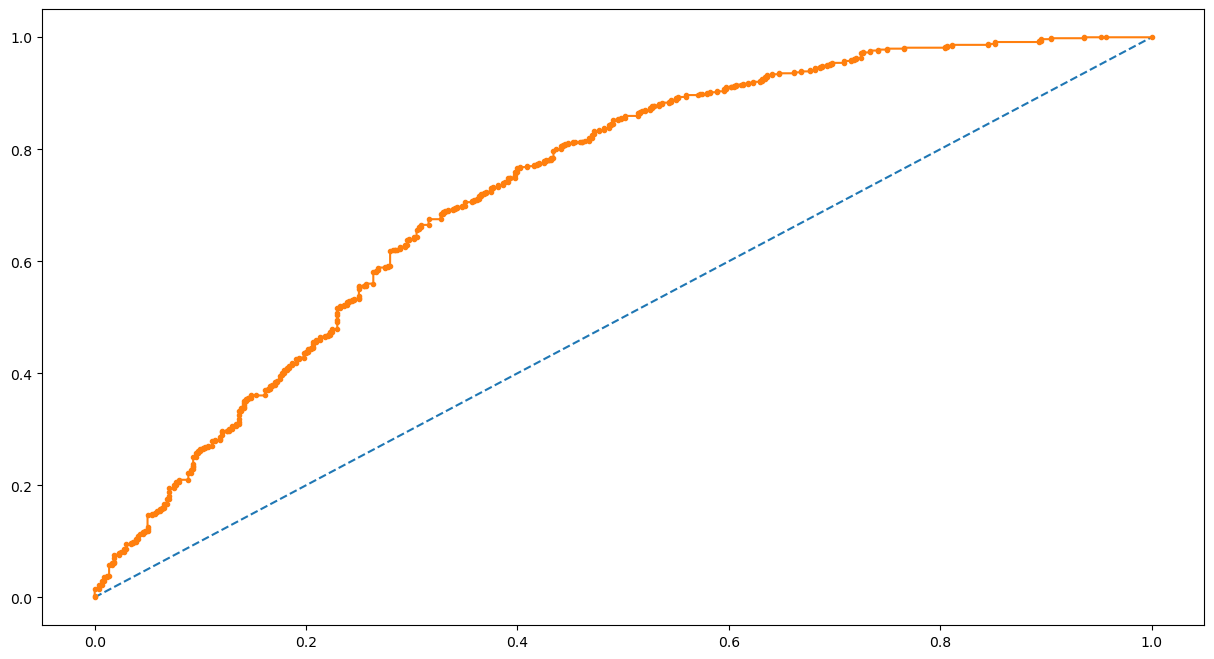

Model 3 AUC: 0.71328


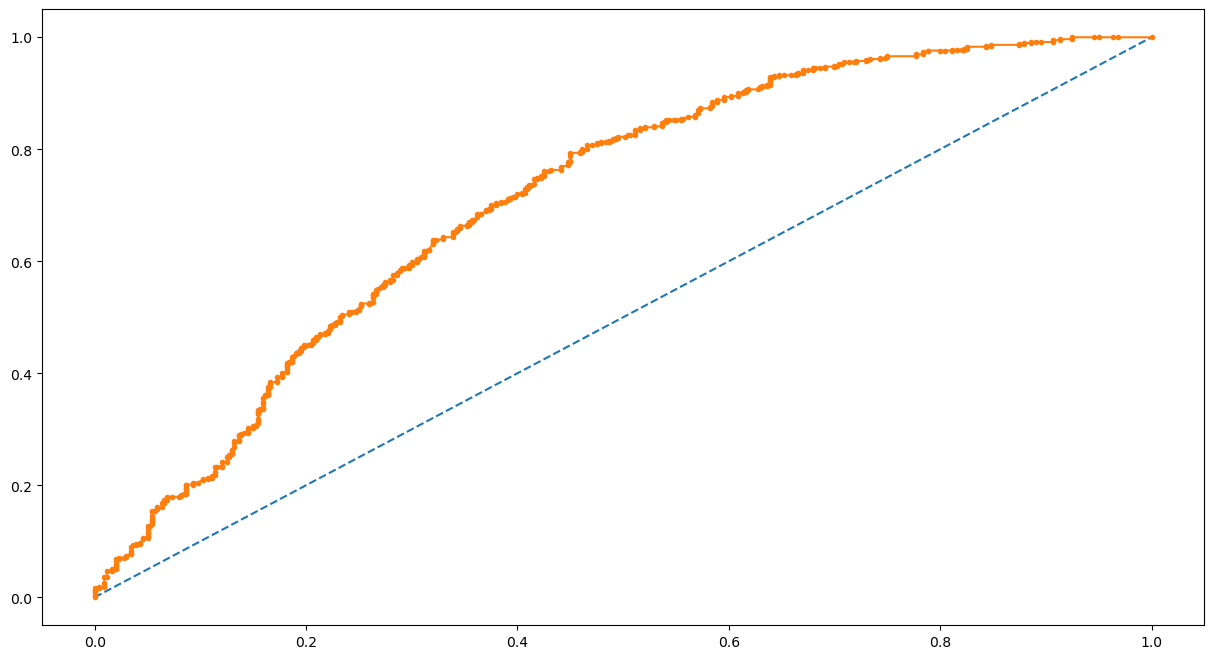

In [338]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Train['Contraceptive_method_used'],model_1_train_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['Contraceptive_method_used'],model_1_train_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Train['Contraceptive_method_used'],model_2_train_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['Contraceptive_method_used'],model_2_train_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Model 1 AUC: 0.68696


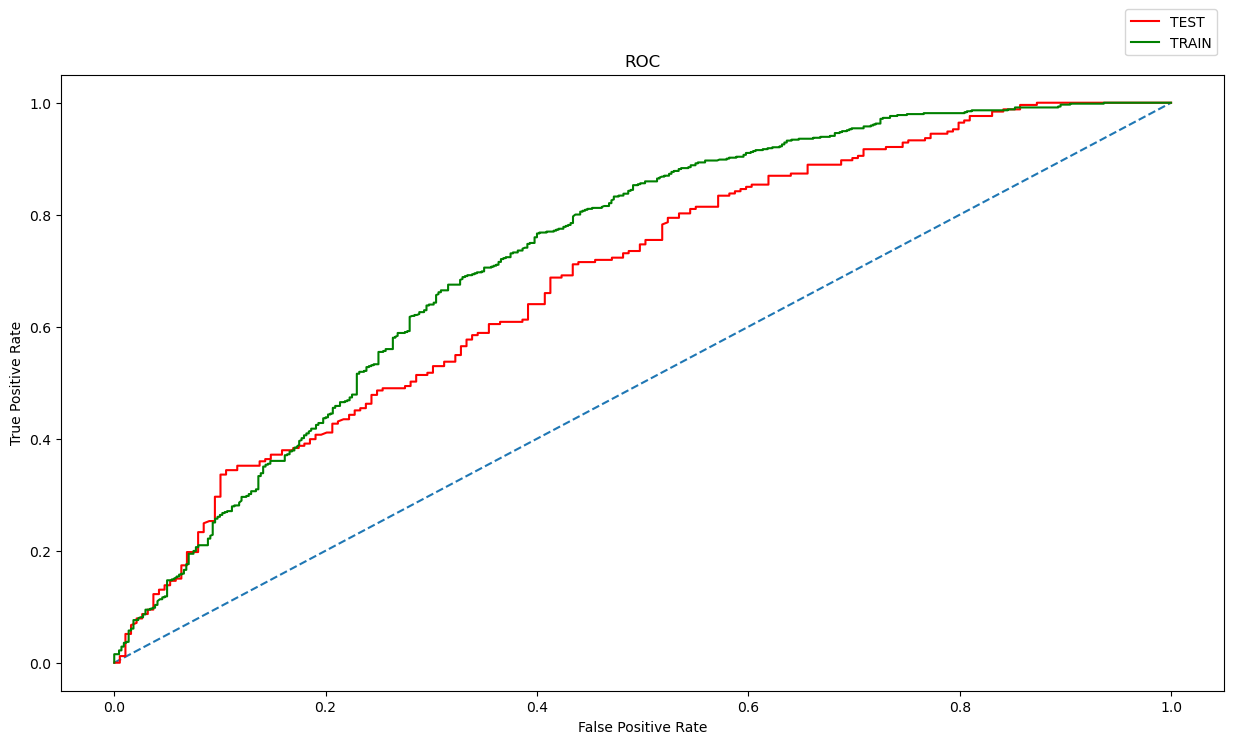

In [317]:
auc = metrics.roc_auc_score(Test['Contraceptive_method_used'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test, tpr_test,color='red',label="TEST")
plt.plot(fpr_train, tpr_train,color='green',label="TRAIN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [313]:
fpr_test, tpr_test, thresholds = metrics.roc_curve(Test['Contraceptive_method_used'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 

In [315]:
fpr_train, tpr_train, thresholds = metrics.roc_curve(Train['Contraceptive_method_used'],model_1_train_probabilities[:, 1])#keeping only the probabilities for the desired 

In [325]:
fpr_test2, tpr_test2, thresholds = metrics.roc_curve(Test['Contraceptive_method_used'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 

In [326]:
fpr_train2, tpr_train2, thresholds = metrics.roc_curve(Train['Contraceptive_method_used'],model_2_train_probabilities[:, 1])#keeping only the probabilities for the desired 

Model 1 AUC: 0.64401


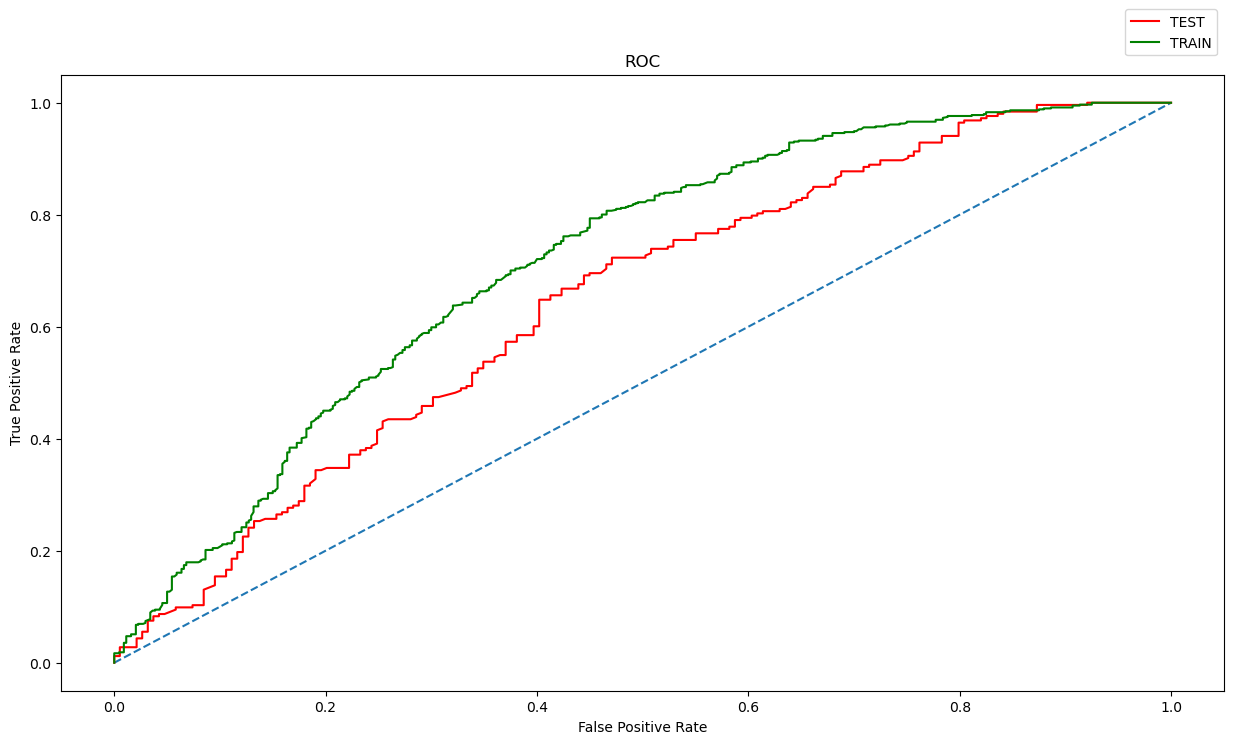

In [327]:
auc = metrics.roc_auc_score(Test['Contraceptive_method_used'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test2, tpr_test2,color='red',label="TEST")
plt.plot(fpr_train2, tpr_train2,color='green',label="TRAIN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')